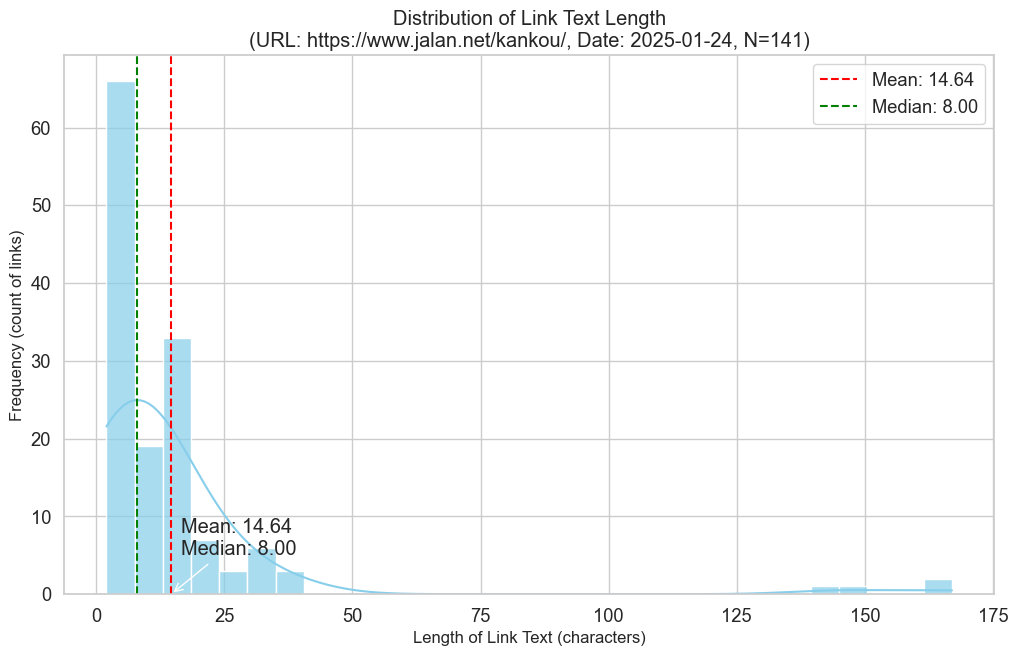

In [1]:
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import seaborn as sns
import time
import numpy as np
import datetime

# 1. スクレイピングするURL
url = "https://www.jalan.net/kankou/"
delay = 2  # リクエスト間隔（秒）

# 2. HTMLを取得
response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')

# 3. リンクテキストを抽出
links = soup.find_all('a')  # <a>タグをすべて取得
link_lengths = []

for link in links:
    text = link.get_text(strip=True)
    if text:  # 空のテキストをスキップ
        link_lengths.append(len(text))

# 遅延をサーバに配慮して挿入
time.sleep(delay)

# 4. データの可視化
sns.set(style="whitegrid", font_scale=1.2)
plt.figure(figsize=(12, 7))

# ヒストグラムを作成
sns.histplot(link_lengths, kde=True, bins=30, color='skyblue', alpha=0.7)

# タイトルに追加情報を盛り込む
scraping_date = datetime.datetime.now().strftime("%Y-%m-%d")
plt.title(f"Distribution of Link Text Length\n(URL: {url}, Date: {scraping_date}, N={len(link_lengths)})")

# 軸ラベルも少し詳しくする
plt.xlabel("Length of Link Text (characters)", fontsize=12)
plt.ylabel("Frequency (count of links)", fontsize=12)

# 平均・中央値の線を表示
mean_length = np.mean(link_lengths)
median_length = np.median(link_lengths)

plt.axvline(mean_length, color='red', linestyle='--', label=f'Mean: {mean_length:.2f}')
plt.axvline(median_length, color='green', linestyle='--', label=f'Median: {median_length:.2f}')

# 凡例を表示
plt.legend()

# 必要に応じて注釈を追加
plt.annotate(
    f"Mean: {mean_length:.2f}\nMedian: {median_length:.2f}",
    xy=(mean_length, 0),  # この0はy軸が対数ではない場合を仮定
    xytext=(mean_length + 2, 5),  # 適宜座標を調整してください
    arrowprops=dict(facecolor='black', arrowstyle='->')
)

# グラフを表示
plt.show()

外れ値に該当するリンクテキストの長さ:
     length
80       31
84       32
85       40
86       31
96       36
99       33
100      36
110     146
112     167
114     144
116     164
117      33
121      31


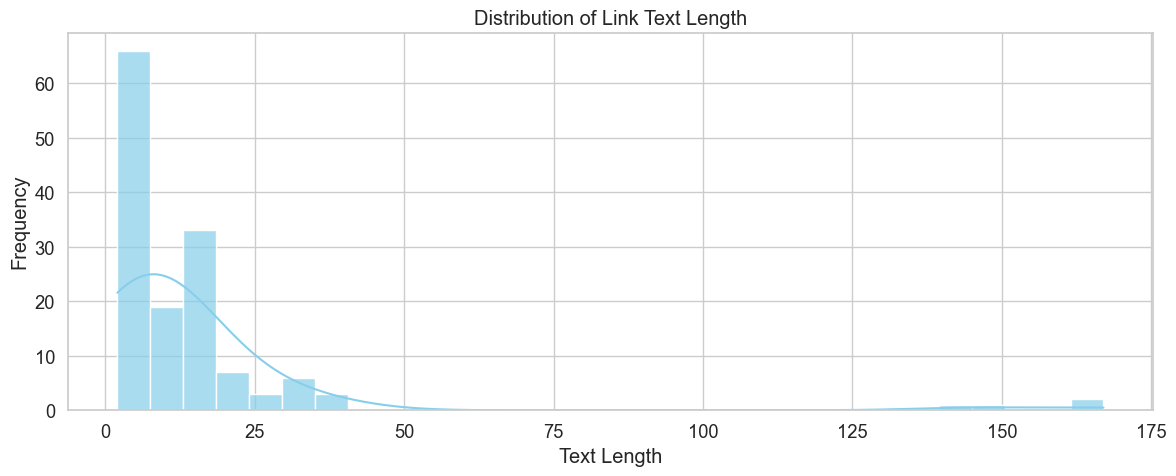

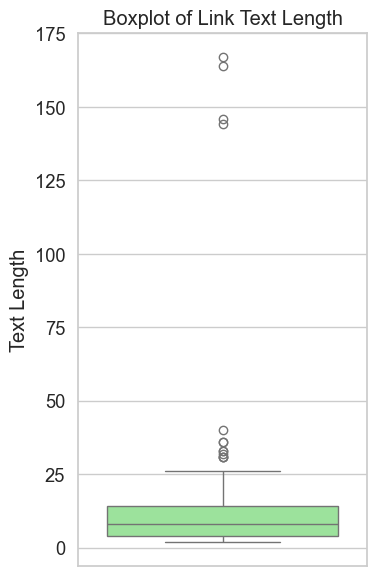

In [1]:
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import time
import datetime

# 1. スクレイピングするURL
url = "https://www.jalan.net/kankou/"
delay = 2  # リクエスト間隔（秒）

# 2. HTMLを取得
response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')

# 3. リンクテキストを抽出
links = soup.find_all('a')  # <a>タグをすべて取得
link_lengths = []

for link in links:
    text = link.get_text(strip=True)
    if text:  # 空のテキストをスキップ
        link_lengths.append(len(text))

# サーバーへの負荷を下げるための遅延
time.sleep(delay)

# 4. 外れ値の閾値を求める（四分位範囲IQRを使用）
# --------------------------------
df = pd.DataFrame(link_lengths, columns=["length"])
Q1 = df["length"].quantile(0.25)
Q3 = df["length"].quantile(0.75)
IQR = Q3 - Q1

# 1.5IQRを超える範囲を外れ値とする一般的な定義
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# 外れ値に該当するデータを抽出
outliers = df[(df["length"] < lower_bound) | (df["length"] > upper_bound)]
print("外れ値に該当するリンクテキストの長さ:")
print(outliers)

# 5. 可視化
sns.set(style="whitegrid", font_scale=1.2)

# (A) ヒストグラム + KDE
plt.figure(figsize=(12, 5))
sns.histplot(link_lengths, kde=True, bins=30, color='skyblue', alpha=0.7)
plt.title("Distribution of Link Text Length")
plt.xlabel("Text Length")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

# (B) 箱ひげ図（Boxplot）で外れ値を視覚的に確認
plt.figure(figsize=(4, 6))
sns.boxplot(y=df["length"], color='lightgreen')
plt.title("Boxplot of Link Text Length")
plt.ylabel("Text Length")
plt.tight_layout()
plt.show()